In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.metrics import classification_report

In [2]:
# 1 Load the data using the following codes:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Note, they are black and white images with only 1 channel instead of 3. Each image size is (28,28) with one channel

In [3]:
# 2. Build the first model try different type of convolution and maxpooling layer. What's the test error.

In [4]:
print(f'x_train.shape = {x_train.shape}; y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}; y_test.shape = {y_test.shape}')

x_train.shape = (60000, 28, 28); y_train.shape = (60000,)
x_test.shape = (10000, 28, 28); y_test.shape = (10000,)


In [5]:
model = models.Sequential()

input_shape = x_train.shape[1:]

print(f'The input shape = {input_shape}')

The input shape = (28, 28)


In [6]:
model.add(layers.Conv1D(32, 3, activation='relu', input_shape= input_shape))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Conv1D(64, 2, activation='relu'))

In [7]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 32)            2720      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             12352     
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             8

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
%%time

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test), callbacks=[callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2603 - accuracy: 0.9205 - val_loss: 0.0890 - val_accuracy: 0.9721
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0944 - accuracy: 0.9728 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0687 - accuracy: 0.9795 - val_loss: 0.0622 - val_accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0514 - val_accuracy: 0.9840
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0646 - val_accuracy: 0.9809
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0552 - val_ac

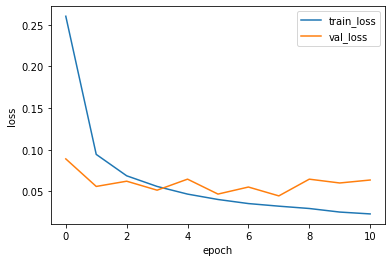

In [11]:
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch

sns.lineplot(x='epoch', y ='loss', data =train_history)
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
plt.legend(labels=['train_loss', 'val_loss'])

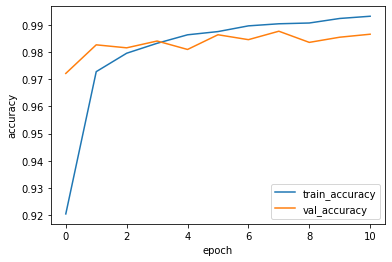

In [12]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
plt.legend(labels=['train_accuracy', 'val_accuracy'])

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f' The test loss = {test_loss:.2f} and test accuracy = {test_acc:.2f}')

 The test loss = 0.06 and test accuracy = 0.99


In [14]:
y_pred_prob = model.predict(x_test)
score = tf.nn.softmax(y_pred_prob)
y_pred = np.argmax(score, axis = 1)
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



The dataset appears to be balanced, meaning we focus on accuracy (which is 0.99). The test error is 1 - 0.99% = 1%.

In [15]:
# 3. Build a second model using different type of convolution and maxpooling layer. What's the test error

In [16]:
model = models.Sequential()

In [17]:
model.add(layers.SeparableConv1D(32, 3, activation='relu', input_shape = input_shape))
model.add(layers.AveragePooling1D(2))
model.add(layers.SeparableConv1D(64, 3, activation='relu'))
model.add(layers.AveragePooling1D(2))
model.add(layers.SeparableConv1D(64, 3, activation='relu'))
model.add(layers.SeparableConv1D(64, 2, activation='relu'))

In [18]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv1d (Separable  (None, 26, 32)           1012      
 Conv1D)                                                         
                                                                 
 average_pooling1d (AverageP  (None, 13, 32)           0         
 ooling1D)                                                       
                                                                 
 separable_conv1d_1 (Separab  (None, 11, 64)           2208      
 leConv1D)                                                       
                                                                 
 average_pooling1d_1 (Averag  (None, 5, 64)            0         
 ePooling1D)                                                     
                                                                 
 separable_conv1d_2 (Separab  (None, 3, 64)           

In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [21]:
%%time

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test), callbacks=[callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7280 - accuracy: 0.7487 - val_loss: 0.2382 - val_accuracy: 0.9275
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2351 - accuracy: 0.9286 - val_loss: 0.1683 - val_accuracy: 0.9445
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1718 - accuracy: 0.9471 - val_loss: 0.1256 - val_accuracy: 0.9593
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1403 - accuracy: 0.9576 - val_loss: 0.1113 - val_accuracy: 0.9644
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1202 - accuracy: 0.9639 - val_loss: 0.0987 - val_accuracy: 0.9683
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1041 - accuracy: 0.9688 - val_loss: 0.0919 - val_accuracy: 0.9705
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.0755 - val_ac

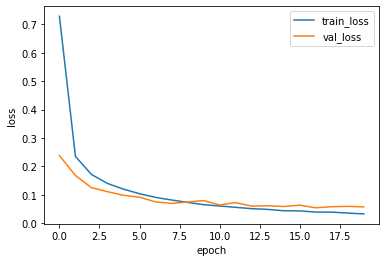

In [22]:
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch

sns.lineplot(x='epoch', y ='loss', data =train_history)
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
plt.legend(labels=['train_loss', 'val_loss'])

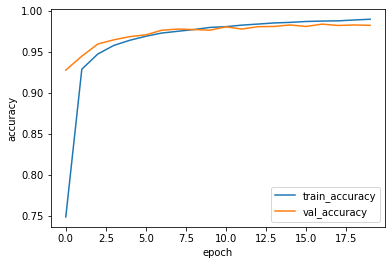

In [23]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
plt.legend(labels=['train_accuracy', 'val_accuracy'])

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f' The test loss = {test_loss:.2f} and test accuracy = {test_acc:.2f}')

 The test loss = 0.06 and test accuracy = 0.98


In [25]:
y_pred_prob = model.predict(x_test)
score = tf.nn.softmax(y_pred_prob)
y_pred = np.argmax(score, axis = 1)
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



The dataset appears to be balanced, meaning we focus on accuracy (which is 0.98). The test error is 1 - 0.98% = 2%.

In [26]:
# 4. Please recommend the best model

Judging by test error, the model in problem 2 is the best model.